# Simulator - Sound Design

Run different MIDI sequences through the simulator and hear the result.

## Helper code

In [1]:
import subprocess

from numpy import *
from matplotlib.pyplot import *
from scipy import signal
from scipy.io import wavfile

import pandas as pd
import IPython.display as idp

### Sequences

In [2]:
sequence_pad1 = """Time,Status,Data0,Data1
0,176,80,{:d} # Preset
1000,144,36,{:d} # On
1010,144,43,{:d} # On
1020,144,48,{:d} # On
1030,144,52,{:d} # On
1040,144,55,{:d} # On
180000,128,36,0 # Off
180010,128,43,0 # Off
180020,128,48,0 # Off
180030,128,52,0 # Off
180040,128,55,0 # Off
180100,144,36,{:d} # On
180110,144,44,{:d} # On
180120,144,48,{:d} # On
180130,144,52,{:d} # On
180140,144,56,{:d} # On
230000,128,36,0 # Off
230010,128,44,0 # Off
230020,128,48,0 # Off
230030,128,52,0 # Off
230040,128,56,0 # Off
250100,144,36,{:d} # On
250110,144,43,{:d} # On
250120,144,48,{:d} # On
250130,144,52,{:d} # On
250140,144,55,{:d} # On
530000,128,36,0 # Off
530010,128,43,0 # Off
530020,128,48,0 # Off
530030,128,52,0 # Off
530040,128,55,0 # Off
"""

sequence_pad2 = """Time,Status,Data0,Data1
0,176,80,{:d} # Preset
1000,144,24,{:d} # On
1010,144,31,{:d} # On
1020,144,36,{:d} # On
1030,144,40,{:d} # On
1040,144,43,{:d} # On
170000,128,24,0 # Off
170010,128,31,0 # Off
170020,128,36,0 # Off
170030,128,40,0 # Off
170040,128,43,0 # Off
200100,144,24,{:d} # On
200110,144,32,{:d} # On
200120,144,36,{:d} # On
200130,144,40,{:d} # On
200140,144,44,{:d} # On
220000,128,24,0 # Off
220010,128,32,0 # Off
220020,128,36,0 # Off
220030,128,40,0 # Off
220040,128,44,0 # Off
250100,144,24,{:d} # On
250110,144,31,{:d} # On
250120,144,36,{:d} # On
250130,144,40,{:d} # On
250140,144,43,{:d} # On
520000,128,24,0 # Off
520010,128,31,0 # Off
520020,128,36,0 # Off
520030,128,40,0 # Off
520040,128,43,0 # Off
"""

### Simulation functions

In [3]:
#%matplotlib notebook
%matplotlib inline

from string import Formatter

def compile_simulator():
    try:
        s = subprocess.check_output(["make", "clean", "all", "SIM=1"], cwd="../app/", stderr=subprocess.STDOUT).decode()
        #print(s)
    except subprocess.CalledProcessError as e:
        print(e.output.decode())

def write_sequence(sequence, preset, velocity_mean, velocity_std):
    with open("../app/midi.csv", "w") as f:
        random.seed(0)
        N = len(list(Formatter().parse(sequence)))
        R = [int(X)%128 for X in velocity_mean+velocity_std*random.randn(N)]
        s = sequence.format(preset, *R)
        f.write(s)

def run_simulator(verbose, compile_first=False):
    if compile_first:
        compile_simulator()
    
    try:
        s = subprocess.check_output(["../app/sbnsamplersim", "600000"], cwd="../app/", stderr=subprocess.STDOUT).decode()
        if verbose:
            print(s)
    except subprocess.CalledProcessError as e:
        print(e.output.decode())

def analyze():
    midi = pd.read_csv("../app/midi.csv", comment="#")
    midi.columns = midi.columns.str.strip()

    fs, x = wavfile.read("../app/dac.wav")
    idp.display(idp.Audio("../app/dac.wav"))

    fig, ax1 = subplots(1, 1, figsize=[8, 3])
    t = arange(len(x))
    ax1.plot(t, x, linewidth=0.2);

    for n in midi.loc[midi["Status"] == 144]["Time"]:
        ax1.plot(n, 0, "^b")

    for n in midi.loc[midi["Status"] == 128]["Time"]:
        ax1.plot(n, 0, "vr")

    for n in midi.loc[midi["Status"] == 176]["Time"]:
        ax1.plot(n, 0, ">y")

    ax1.grid(True)
    ymax = max([abs(X) for X in ax1.get_ylim()])
    ax1.set_ylim(-ymax, ymax)
    fig.tight_layout()
    #idp.display(midi)

    fig, ax = subplots(1, 1, figsize=[8, 3])
    ax.specgram(x, Fs=fs, scale="dB", cmap="jet");
    ax.grid(True)
    fig.tight_layout()

def simulate(sequence, preset, velocity_mean, velocity_std, compile_first=False, verbose=False):
    write_sequence(sequence, preset, velocity_mean, velocity_std)
    run_simulator(verbose, compile_first)
    analyze()

## Simulation

/home/soren/vcs/sbnsampler/notebooks/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7739: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


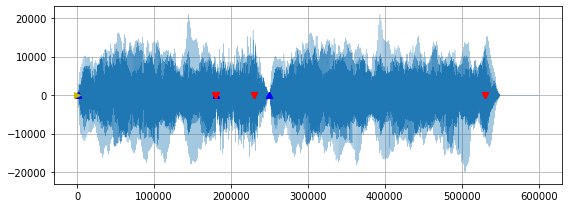

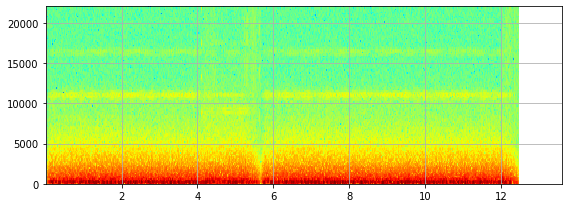

In [5]:
simulate(sequence_pad1, 7, 63, 0, compile_first=True)